# Feed Forward NN with Backpropogation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class FeedForwardNN:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.w1 = np.random.randn(2, 2)  # 2 hidden neuron
        self.b1 = np.random.randn(1, 2)  # Bias for hiddle
        self.w2 = np.random.randn(2, 1)  # 1 Output neuron
        self.b2 = np.random.randn(1, 1)  # Bias for output
        self.error_ls = []               # Storing error at every 500 epochs
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derevative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        for i in range(self.epochs):
            # Feed Forward
            hidden_input = np.dot(X, self.w1) + self.b1
            hidden_output = self.sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.w2) + self.b2
            final_output = self.sigmoid(final_input)

            # Compute the Error
            error = y - final_output

            # Backpropogation
            der_output = error * self.sigmoid_derevative(final_output)
            der_hidden = np.dot(der_output, self.w2.T) * self.sigmoid_derevative(hidden_output)

            # update the weights and biases
            self.w2 += np.dot(hidden_output.T, der_output) * self.lr
            self.b2 += np.sum(der_output, axis=0, keepdims=True) * self.lr
            self.w1 += np.dot(X.T, der_hidden) * self.lr
            self.b1 += np.sum(der_hidden, axis=0, keepdims=True) * self.lr

            # Print Loss every 500 epochs
            if i % 500 ==0:
                loss = np.mean(np.abs(error))
                self.error_ls.append(loss)
                print(f"Epoch {i}, Loss: {loss}")
        
    def predict(self, X):
        hidden_input = np.dot(X, self.w1) + self.b1
        hidden_output = self.sigmoid(hidden_input)

        final_input = np.dot(hidden_output, self.w2) + self.b2
        final_output = self.sigmoid(final_input)
        return (final_output > 0.5).astype(int).ravel()      # Converted the probability into binary output

In [10]:
inp_data = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
XOR_out = np.array([[0], [1], [1], [0]])

In [11]:
xor_nn = FeedForwardNN(learning_rate=0.5, epochs=10000)

In [12]:
xor_nn.fit(inp_data, XOR_out)

Epoch 0, Loss: 0.4998022060257505
Epoch 500, Loss: 0.4925007586524134
Epoch 1000, Loss: 0.15184248140483805
Epoch 1500, Loss: 0.07280623596958265
Epoch 2000, Loss: 0.05291077816022666
Epoch 2500, Loss: 0.04323496238468928
Epoch 3000, Loss: 0.037318088188674575
Epoch 3500, Loss: 0.03324606017354487
Epoch 4000, Loss: 0.030233321695344505
Epoch 4500, Loss: 0.02789252278746416
Epoch 5000, Loss: 0.02600844518710935
Epoch 5500, Loss: 0.024450985893963474
Epoch 6000, Loss: 0.023136386330384076
Epoch 6500, Loss: 0.022008025149990958
Epoch 7000, Loss: 0.021026102516879842
Epoch 7500, Loss: 0.02016173511937443
Epoch 8000, Loss: 0.019393396728864556
Epoch 8500, Loss: 0.018704678816497677
Epoch 9000, Loss: 0.018082829965231723
Epoch 9500, Loss: 0.017517773446829903


In [13]:
xor_nn.predict([0, 0])

array([0])

In [14]:
xor_nn.predict([0, 1])

array([1])

In [15]:
xor_nn.predict([1, 0])

array([1])

In [16]:
xor_nn.predict([1, 1])

array([0])

In [17]:
[xor_nn.predict(i) for i in inp_data]

[array([0]), array([1]), array([1]), array([0])]

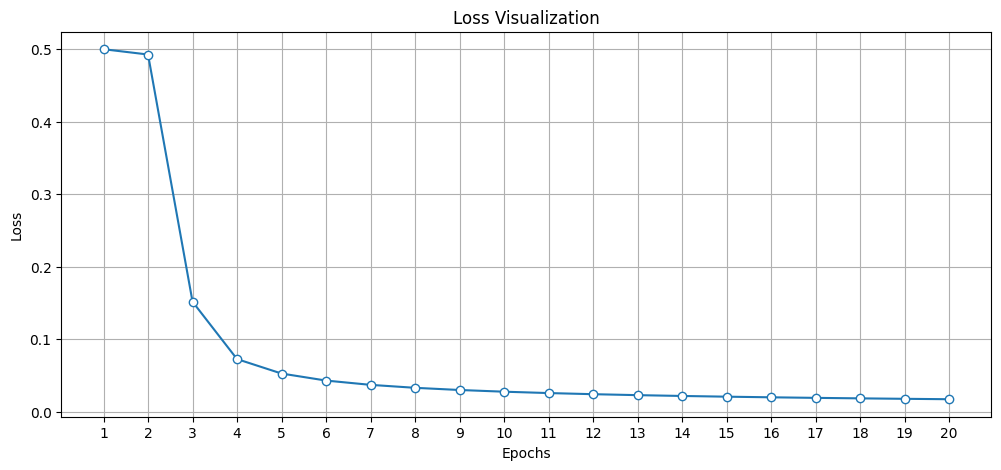

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 21), xor_nn.error_ls, marker="o", markerfacecolor="#FFFFFF")
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(zorder=0)
plt.xticks(range(1, 21))
plt.show()